# Background & Context

    There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

    In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind,the pricing scheme of these used cars becomes important in order to grow in the market.

    As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

# Objective

    Explore and visualize the dataset.
    Build a linear regression model to predict the prices of used cars.
    Generate a set of insights and recommendations that will help the business.

# Data Dictionary 

    S.No. : Serial Number
    Name : Name of the car which includes Brand name and Model name
    Location : The location in which the car is being sold or is available for purchase Cities
    Year : Manufacturing year of the car
    Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
    Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
    Transmission : The type of transmission used by the car. (Automatic / Manual)
    Owner : Type of ownership
    Mileage : The standard mileage offered by the car company in kmpl or km/kg
    Engine : The displacement volume of the engine in CC.
    Power : The maximum power of the engine in bhp.
    Seats : The number of seats in the car.
    New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
    Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

### Import necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  # to avoid warnings

sns.set(style="darkgrid")
# adds a nice background to the graphs
sns.set(color_codes=True) 
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
sns.set_palette("pastel") # Set the palette to the "pastel"

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear regression model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
%matplotlib inline


### Load data

In [2]:
df = pd.read_csv('used_cars_data.csv')

In [3]:
# copying the data to new dataframe for all manipulation and keeping original data set intact
dataDF = df.copy()

### Inspect top 5 and bottom 5 rows

In [4]:
dataDF.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,NaN,17.74


* There are some missing values for New_Price, Owner_Type seems to First is more than second and later.
* Fuel Type mostly is of Diesel or Petrol

In [5]:
dataDF.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,NaN,nan
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,NaN,nan
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,NaN,nan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00,NaN,nan
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00,NaN,nan


* New_Price has missing values and Price feature too has missign values.

In [6]:
# Get the dimension of original record set
dataDF.shape

(7253, 14)

Dataframe has 7253 rows and 14 columns

In [7]:
# inspecting list of columns
dataDF.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [8]:
# Checking the column's data types and missing values
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB



1. Dependent variable Price is type float but it has missig values
2. Mileage, Engine , Power , Seats, New_price and Price has missing values
3. SN, Year, Kilometers_driven, Seats and Price are numeric in nature, remaining column are object type.


In [9]:
dataDF.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

* S.No. column is to keep track of count of records.This is not required column.

* New_Price has most of the missing values, this was also verified earlier. since it has more than 50% 
records missing. Imputing with mean value can result in biased prediction.

* Removing rows with missing Price because we cann't train model with missing price.

### Summary of the dataset

In [10]:
dataDF.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.00,NaN,NaN,NaN,3626.00,2093.91,0.00,1813.00,3626.00,5439.00,7252.00
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.00,NaN,NaN,NaN,2013.37,3.25,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.00,NaN,NaN,NaN,58699.06,84427.72,171.00,34000.00,53416.00,73000.00,6500000.00
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Price of car varies from 0.44 lakh to 160 lakhs
* Common Fuel type is Diesel, Transmission is Manual and Owner_Type is First
* Most preferred seat type is 5 seat cars
* All car models are between 1996 and 2019
* Kilometers_Driven has big differnece between min and max value therefore std deviation is very high

### From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.

## Data Preprocessing

In [11]:
# Dropping S.No column
dataDF.drop('S.No.', axis=1, inplace=True)

In [12]:
# Dropping New_Price column
dataDF.drop('New_Price', axis=1, inplace=True)

In [13]:
# Removing rows with missing Price values
dataDF.dropna(subset=["Price"], inplace=True)
dataDF.shape

(6019, 12)

In [14]:
# First trim the units from columns before applying any imputation
def trimunits(values):
    '''Stripping unit part from column values'''
     
    if isinstance(values, str):
         return values.split()[0].strip()
    else:
        return np.nan
    
cols_to_trim = ['Mileage', 'Engine', 'Power']
for col in cols_to_trim:
    dataDF[col] = dataDF[col].apply(trimunits)

dataDF.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1,814,55.2,5.00,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.00,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.5,8.00,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.6,5.00,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3,1248,74,5.00,1.95


**Inspecting each columns , taking action to impute, apply average or droping the rows**

In [15]:
# Inspect missing values for mileage
dataDF.loc[df['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72,41,5.00,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798,73,5.00,12.75


In [16]:
dataDF.loc[df['Name'].str.contains('Mahindra E Verito')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72,41,5.00,13.00


Since there is only one "Mahindra E Verito" in our data set that has missing value. We cann't assign value by taking mean of other.

In [17]:
dataDF.loc[df['Name'].str.contains('Toyota Prius')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798,73,5.00,12.75


Similarly,  there is only one "Toyota Prius" in our data set that has missing value. we cann't assign value by taking mean of other.

Now we'll google search for Mileage value for these models and assign to the missing value.

In [18]:
# Google searched the mileage for missing models for mileage
# For Mahindra Verito E D4 [2016-2019] mileage is 140 km/full charge. so we'll assign milege value 
# For Toyota Prius 2009-2016 Z4 mileage was not available on internet. So we'll remove this row.
dataDF.loc[dataDF['Name'] == 'Mahindra E Verito D4', 'Mileage'] = 140
dataDF.dropna(subset=["Mileage"], inplace=True)

In [19]:
# check the missign values now
dataDF.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [20]:
# Checking for missing values row wise
num_missing = dataDF.isnull().sum(axis=1)
num_missing.value_counts()

0    5976
3      36
1       6
dtype: int64

There seems to have same row missing values for 'Engine' and 'Power' and 'Seats'. We'll have inspect these rows to check for pattern , or based on nature of data of column, impute the values

In [21]:
# Checking for missing 1 missing values values for each row.
dataDF[num_missing == 1]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498,99,nan,3.60
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493,100,nan,1.70
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061,null,nan,1.50
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953,null,nan,7.00
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061,null,nan,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061,null,nan,1.75


In [22]:
# Checking for 3 missign values for each row
dataDF[num_missing == 3].sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,nan,2.95
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,NaN,NaN,nan,1.75
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,nan,18.00
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,nan,2.35
4952,Fiat Punto 1.4 Emotion,Kolkata,2010,47000,Petrol,Manual,First,14.6,NaN,NaN,nan,1.49
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1,NaN,NaN,nan,4.70
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0,NaN,NaN,nan,40.88
5185,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.1,NaN,NaN,nan,3.65
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,nan,3.20
2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.0,NaN,NaN,nan,0.70


* On inspecting, some of the cars has '0.0' mileage value and Power has 'null'. Similarly, We'll have
to make additional check for null and 0 values for Year, Kilometers_drive, Mileage, Engine, Power ,Seats and Price columns
* Treatment for missing values for Engine, Power and Seats will done in later steps.

In [23]:
# converting 'Mileage', 'Engine', 'Power' column to string type first, 
# there are some values in column which is 'null'
float_cols = ['Mileage', 'Engine', 'Power']
for col in float_cols:
    dataDF[col] = dataDF[col].astype('str').apply(lambda x: x.strip())

In [24]:
# Replace 'null' value of 'Mileage', 'Engine', 'Power' with np.nan
for col in float_cols:
    dataDF.loc[dataDF[col] == 'null',col] = np.nan

In [25]:
# converting 'Mileage', 'Engine', 'Power' to float type
for col in float_cols:
    dataDF[col] = dataDF[col].astype('float64')

In [26]:
# Finding cars with mileage entry of 0
dataDF.loc[dataDF['Mileage'] <= 0].shape

(68, 12)

There seemes to be 68 entry for mileage has 0 miles. Replace these with mean of mileage

In [27]:
# Replacing missing mileage with mean value of column
dataDF.loc[dataDF['Mileage'] <= 0] = dataDF['Mileage'].mean()

**Similarly check for 0 value on numeric fields - Year, Kilometers_Driven and Price**

In [28]:
dataDF.loc[dataDF['Year'] <= 0].shape

(0, 12)

In [29]:
dataDF.loc[dataDF['Kilometers_Driven'] <= 0].shape

(0, 12)

In [30]:
dataDF.loc[dataDF['Price'] <= 0].shape

(0, 12)

There seems to be no invalid values in Year, Kilometers_Driven and Price columns

**Processing for Missing value of Engine and Power feature**

In [31]:
# Creating a separate column 'EnginePower' which will take use the formula Engine CC/ Horse power. 
# And missing value in this column will be replace with mean of this column.
# There is coorelation between CC and horse power, although there are many other factor determines the 
# horse power but we can assume they are coorelated but not very strongly.
dataDF['EnginePower'] = dataDF['Engine']/dataDF['Power']
dataDF['EnginePower'].fillna(dataDF['EnginePower'].mean(), inplace=True)  # mean imputation

In [32]:
dataDF.loc[dataDF['EnginePower'] <= 0].shape

(0, 13)

There seems to be no invalid value for EnginePower too.

In [33]:
# Dropping the 'Engine' and 'Power' columns. Since they are not required now.
dataDF.drop(['Engine','Power'] , axis=1, inplace=True)

In [34]:
# Finding most commonly occuring seat type and imputing this to missing value
dataDF['Seats'].value_counts(dropna = False)

5.00     4962
7.00      674
8.00      133
4.00       99
18.16      68
nan        30
6.00       29
2.00       15
10.00       4
9.00        3
0.00        1
Name: Seats, dtype: int64

For Seats 5 seems to most common type and there is one record which has no  seats assigned. Therefore, 
we'll assign seat = 5 for both this cases as well as for null value case.
Also, there is seats= 18.155211. which seems unlikely we'll investigate is later.

In [35]:
dataDF['Seats'].fillna(5, inplace=True) # null seat value
dataDF.loc[dataDF['Seats'] <= 0] = 5 # 0 seat value

### Inspect the current state of data frame after preprocessing.

In [36]:
dataDF.shape

(6018, 11)

In [37]:
dataDF.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Seats                0
Price                0
EnginePower          0
dtype: int64

Now , there is no missing or null values in current data set

In [38]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6018 non-null   object 
 1   Location           6018 non-null   object 
 2   Year               6018 non-null   float64
 3   Kilometers_Driven  6018 non-null   float64
 4   Fuel_Type          6018 non-null   object 
 5   Transmission       6018 non-null   object 
 6   Owner_Type         6018 non-null   object 
 7   Mileage            6018 non-null   float64
 8   Seats              6018 non-null   float64
 9   Price              6018 non-null   float64
 10  EnginePower        6018 non-null   float64
dtypes: float64(6), object(5)
memory usage: 564.2+ KB


Name, Location , Fuel_Type, Transmission are Owner_Type are Object type.

Remaining columns are Numeric type.

In [39]:
# Creating a car company column from the name column. Since many of the other attributes like fuel type, power,
# mileage etc is covered through other column for same car model, we can safely extract brand name
dataDF['Car_Company'] = dataDF.Name.str.split(expand=True)[0]
# Converting Car_Company column as type category
dataDF['Car_Company'] = dataDF['Car_Company'].astype('category').apply(lambda x: x.capitalize().strip())

In [40]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6018 non-null   object 
 1   Location           6018 non-null   object 
 2   Year               6018 non-null   float64
 3   Kilometers_Driven  6018 non-null   float64
 4   Fuel_Type          6018 non-null   object 
 5   Transmission       6018 non-null   object 
 6   Owner_Type         6018 non-null   object 
 7   Mileage            6018 non-null   float64
 8   Seats              6018 non-null   float64
 9   Price              6018 non-null   float64
 10  EnginePower        6018 non-null   float64
 11  Car_Company        5949 non-null   object 
dtypes: float64(6), object(6)
memory usage: 611.2+ KB


**Inspecting non-numeric columns.**

In [41]:
cat_cols = list(dataDF.select_dtypes(exclude=np.number).columns)
cat_cols

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_Company']

In [42]:
# Method to get all unique values from a given list of columns. Used from case study method
values_to_display = 15;
def getuniquevals():
    '''Get unique values and their counts for each for given column'''
    for cat in cat_cols: #[ 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']:
        print(f'Unique values  for "{cat}" is \n')
        values = dataDF[cat].value_counts(dropna = False)
        print(values[:values_to_display])
        if (len(values) > values_to_display ):
            print(f'Only displaying {values_to_display} of {len(values)} values')
        else:
            print(f'Total unique values is {len(values)}')
        print('*'*50, '\n')
    
getuniquevals()

Unique values  for "Name" is 

18.15521103356602             68
Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Honda City 1.5 S MT           34
Maruti Swift Dzire VDI        34
Maruti Swift VDI BSIV         31
Maruti Ritz VDi               30
Hyundai i10 Sportz            30
Toyota Fortuner 3.0 Diesel    29
Honda Amaze S i-Dtech         27
Hyundai Grand i10 Sportz      27
Honda Brio S MT               25
Maruti Ertiga VDI             25
Honda City 1.5 V MT           24
Hyundai Verna 1.6 SX          23
Name: Name, dtype: int64
Only displaying 15 of 1844 values
************************************************** 

Unique values  for "Location" is 

Mumbai               784
Hyderabad            730
Kochi                648
Coimbatore           629
Pune                 611
Delhi                552
Kolkata              532
Chennai              486
Jaipur               408
Bangalore            349
Ahmedabad            220
18.15521103356602     68
5                      1
Na

In [43]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6018 non-null   object 
 1   Location           6018 non-null   object 
 2   Year               6018 non-null   float64
 3   Kilometers_Driven  6018 non-null   float64
 4   Fuel_Type          6018 non-null   object 
 5   Transmission       6018 non-null   object 
 6   Owner_Type         6018 non-null   object 
 7   Mileage            6018 non-null   float64
 8   Seats              6018 non-null   float64
 9   Price              6018 non-null   float64
 10  EnginePower        6018 non-null   float64
 11  Car_Company        5949 non-null   object 
dtypes: float64(6), object(6)
memory usage: 611.2+ KB


On Inspecting the each object type from above result,  there is unique '18.15521103356602' and '5'. Also there is pattern in it. Each object has exactly same count 68 and 1 for their values.
Which is clearly a invalid values for their category. Lets inspect it before dropping these rows.

In [44]:
# Converting only 'Name' column to varify invalid rows pattern
dataDF['Name'] = dataDF['Name'].astype('str').apply(lambda x: x.strip())
invalidDF = dataDF.loc[(dataDF['Name'] == '18.15521103356602')| (dataDF['Name'] == '5')]
invalidDF

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,EnginePower,Car_Company
14,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN
67,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN
79,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN
194,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN
229,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN
262,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN
307,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN
424,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN
443,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN
544,18.15521103356602,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,18.16,1.00,NaN


In [45]:
invalidDF.shape

(69, 12)

Clearly these records are invalid and not required for model building.Therefore, dropping these rows

In [46]:
# Removing rows with  invalid value of 18.15521103356602 and 5
dataDF.drop(dataDF[(dataDF['Name'] == '18.15521103356602')| (dataDF['Name'] == '5')].index, inplace = True)
dataDF.shape

(5949, 12)

In [47]:
getuniquevals()

Unique values  for "Name" is 

Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Maruti Swift Dzire VDI        34
Honda City 1.5 S MT           34
Maruti Swift VDI BSIV         31
Maruti Ritz VDi               30
Hyundai i10 Sportz            30
Toyota Fortuner 3.0 Diesel    29
Honda Amaze S i-Dtech         27
Hyundai Grand i10 Sportz      27
Maruti Ertiga VDI             25
Honda Brio S MT               25
Honda City 1.5 V MT           24
Hyundai Verna 1.6 SX          23
Maruti Wagon R VXI            23
Name: Name, dtype: int64
Only displaying 15 of 1842 values
************************************************** 

Unique values  for "Location" is 

Mumbai        784
Hyderabad     730
Kochi         648
Coimbatore    629
Pune          611
Delhi         552
Kolkata       532
Chennai       486
Jaipur        408
Bangalore     349
Ahmedabad     220
Name: Location, dtype: int64
Total unique values is 11
************************************************** 

Unique values  for "F

Now there is no invalid unique '18.15521103356602' and '5' values for  'Name' ,'Location', 'Fuel_Type',
'Transmission', 'Owner_Type' columns

In [48]:
# Converting 'Name', 'Car_Company','Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats'
# into categorical values

cat_cols.append('Seats') # Including Seats column into type category
for col in cat_cols:
    dataDF[col] = dataDF[col].astype('category')

# We can safely drop Name column now. As explained earlier while creating 'Car_Company' column
dataDF.drop('Name', inplace=True, axis=1)

dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5949 non-null   category
 1   Year               5949 non-null   float64 
 2   Kilometers_Driven  5949 non-null   float64 
 3   Fuel_Type          5949 non-null   category
 4   Transmission       5949 non-null   category
 5   Owner_Type         5949 non-null   category
 6   Mileage            5949 non-null   float64 
 7   Seats              5949 non-null   category
 8   Price              5949 non-null   float64 
 9   EnginePower        5949 non-null   float64 
 10  Car_Company        5949 non-null   category
dtypes: category(6), float64(5)
memory usage: 316.4 KB


All columns are converted into appropriate data types


1) Car_Company, Location, Fuel_Type, transmission,Owner_Type, Seats into category

2) Year, Kilometers_Driven,Mileage, EnginePower, Price are of type numeric

### Summary of the dataset.

In [49]:
dataDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5949.00,2013.41,3.22,1998.00,2012.00,2014.00,2016.00,2019.00
Kilometers_Driven,5949.00,58566.07,91667.24,171.00,33901.00,53000.00,72996.00,6500000.00
Mileage,5949.00,18.36,4.46,6.40,15.30,18.20,21.10,140.00
Price,5949.00,9.46,11.14,0.44,3.50,5.65,9.90,160.00
EnginePower,5949.00,15.11,3.24,1.76,13.34,14.89,16.22,41.94


1) Mean of year can be assumed 2013 and its 50 percentile is 2014. so it can be assumed left skewed

2) Min year is 1998 and Max year us 2019

3) Kilometers_drive, Price, EnginePower is right skewed

4) Mileage is slightly right skewed

5) Kilometers_drive has big std deviation and very big differncen between min=171 and max=6500000

6) Mileage has minimum= 6.4 and maximum 140 which might be the value of electric car , which we added earlier

7) Price has big differnce min=0.44 lakh and max=160 lakh 

8) Engine power has big differnce too, min=1.75 and max=41.94 but theri standard deviation is not very high.


## Data Visualization

### Univariate Analysis

using same (histogram_boxplot) method which we used in case study for linear regression

In [50]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# This function will craete a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

### *Price* (the target variable)

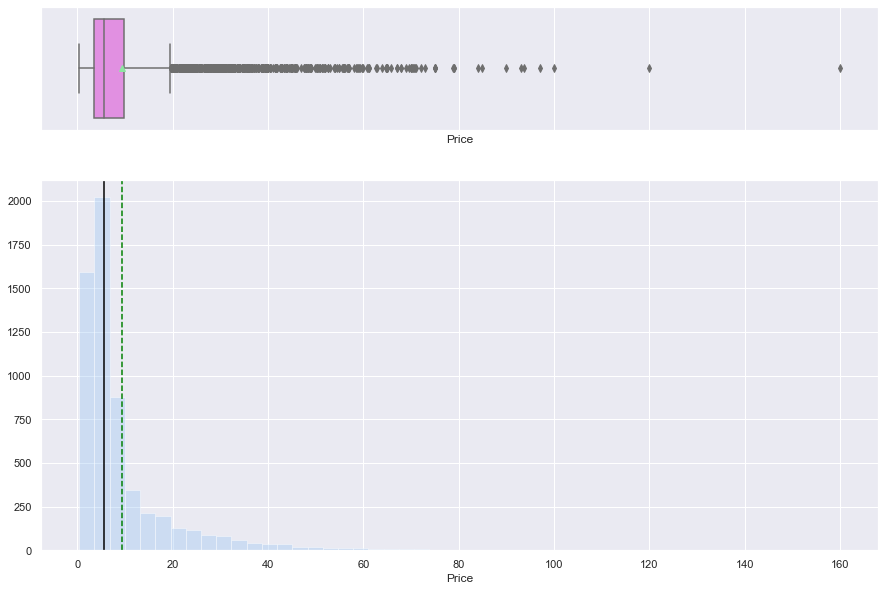

In [51]:
histogram_boxplot(dataDF["Price"])

* The distribution is right-skewed with a median price is less than 5lakh and Mean price is close to 9 lakh.

### *Year*

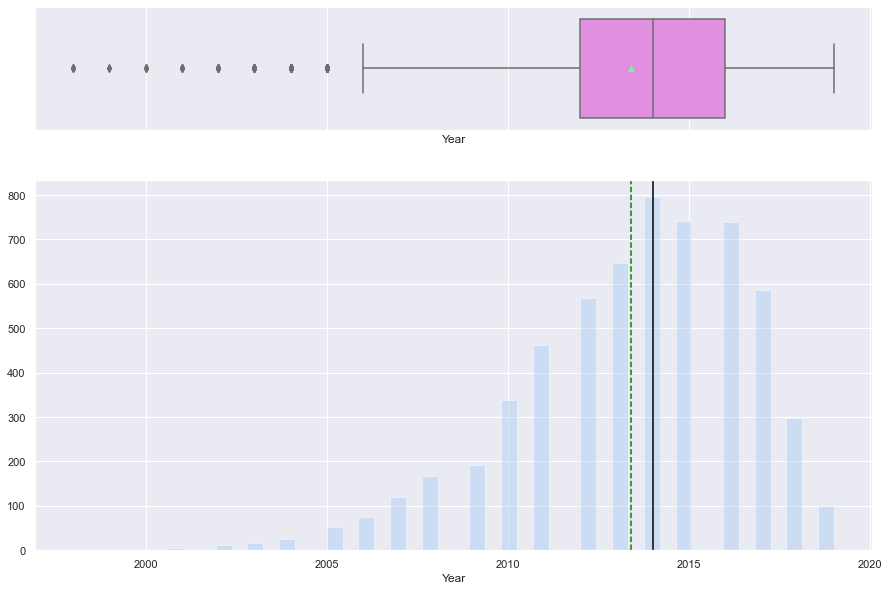

In [52]:
histogram_boxplot(dataDF["Year"])

* The distribution is left-skewed with a median year 2014 and mean year 2013.

### *Kilometers_Driven*

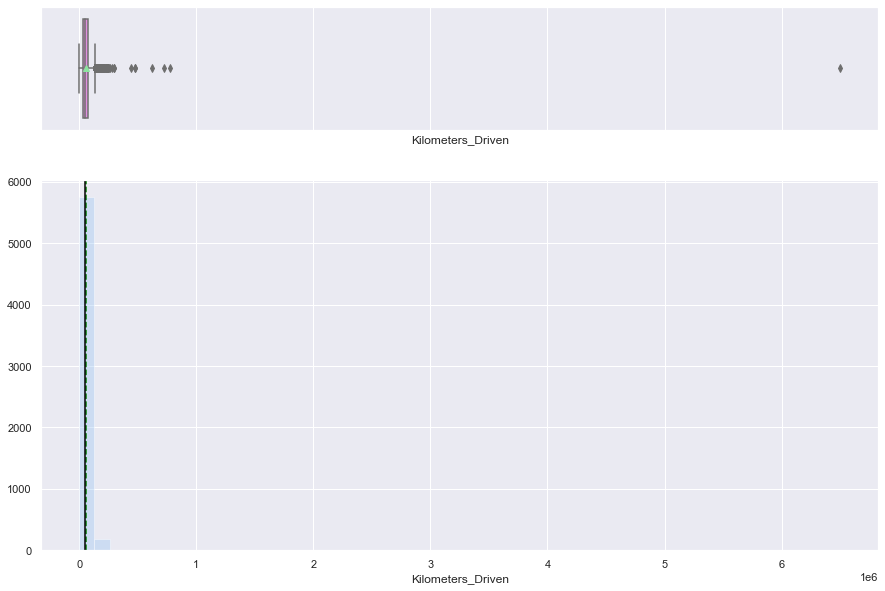

In [53]:
histogram_boxplot(dataDF["Kilometers_Driven"])

* Mean and Median value is almost same. As per mean and median most of the cars are driven around 50000 km. Some of the cars are driven more than 100000 kms

### *Mileage*

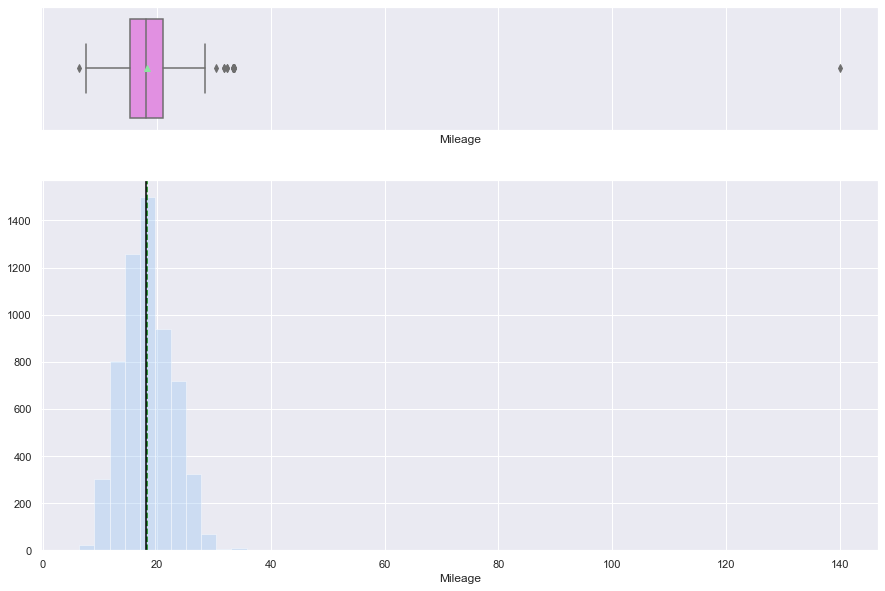

In [54]:
histogram_boxplot(dataDF["Mileage"])

* Mileage is almost normally distributed. Its mean and medians are same and its close to 18km/ltr

### *EnginePower*

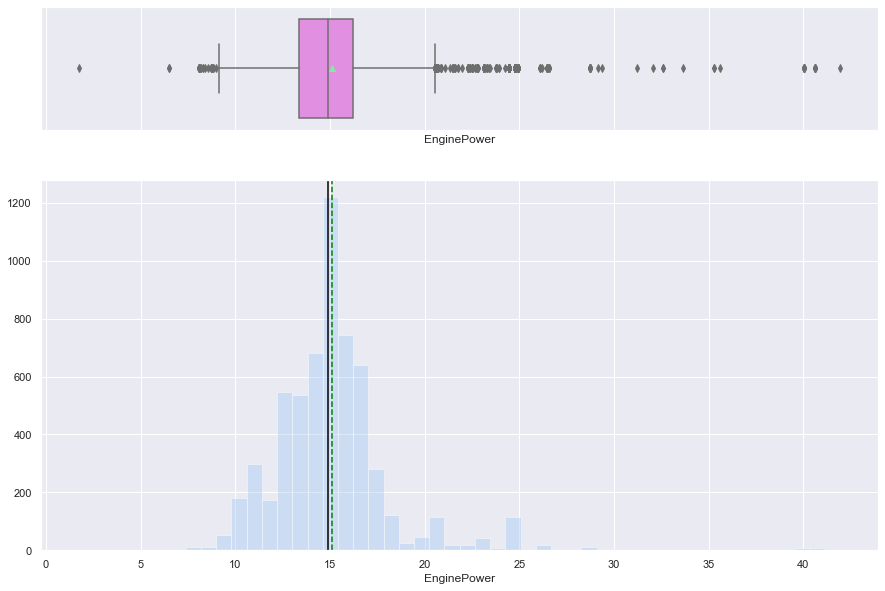

In [55]:
histogram_boxplot(dataDF["EnginePower"])

* The distribution is right-skewed with mean and median close to 15. 

In [56]:
# Using same method which we used in case study for linear regression

# Function to create barplots that indicate percentage for each category.

def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

### *Location*

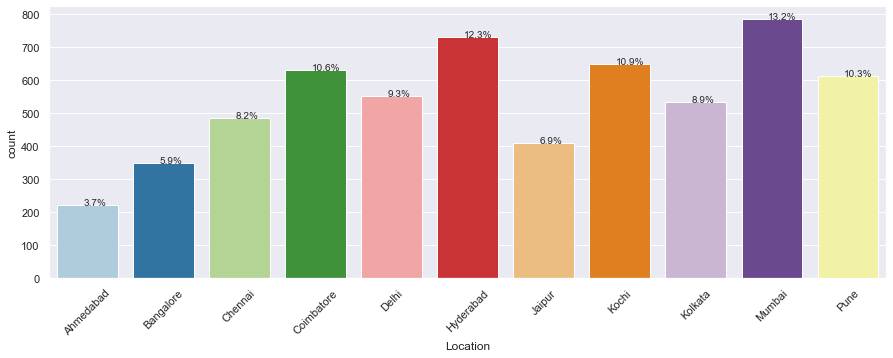

In [57]:
perc_on_bar(dataDF, 'Location')

* *Mumbai* has the biggest market share  and Ahmedabad has smallest market share
* Car ownership has mix percentage for Tier 1 and Tier 2 cities

### *Fuel_Type*

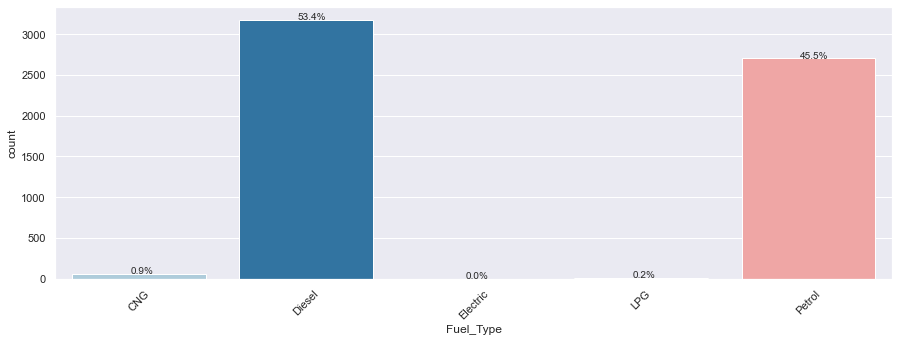

In [58]:
perc_on_bar(dataDF, 'Fuel_Type')

* People prefer Fuel version of type Diesel for car most and Electric version is least liked.
* Diesel version is cheap and fuel stations are frequent.
* For Electric car charging stations are not available and these cars are very costly.

### *Transmission*

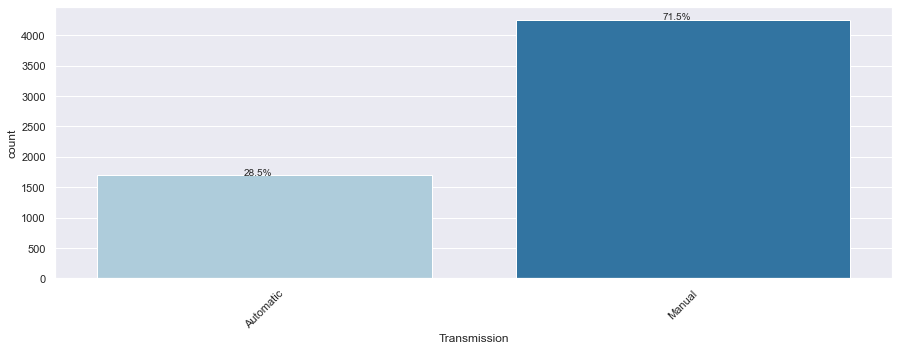

In [59]:
perc_on_bar(dataDF, 'Transmission')

* Manual version are 2.5 times more preferreed than Automatic.
* Reason for this liking is Automatic version is priced higher than Manual
* People like cars which gives more control to them.

### *Owner_Type*

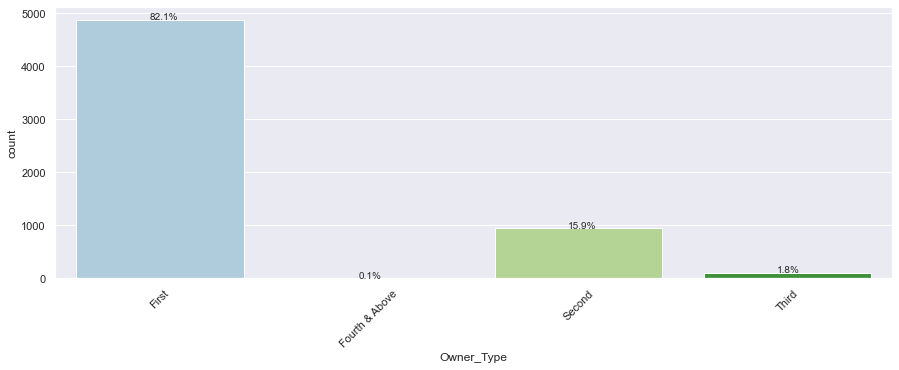

In [60]:
perc_on_bar(dataDF, 'Owner_Type')

* Most of the owner type is first owner and Its more than five times more than second owner types.

### *Seats*

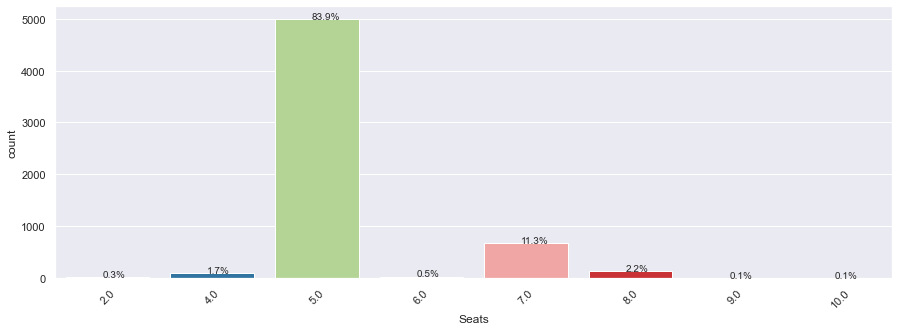

In [61]:
perc_on_bar(dataDF, 'Seats')

* Biggest share for cars is Sedan type, which has 5 seats. Thats means car preference is also 
  driven by family size

### *Car_Company*

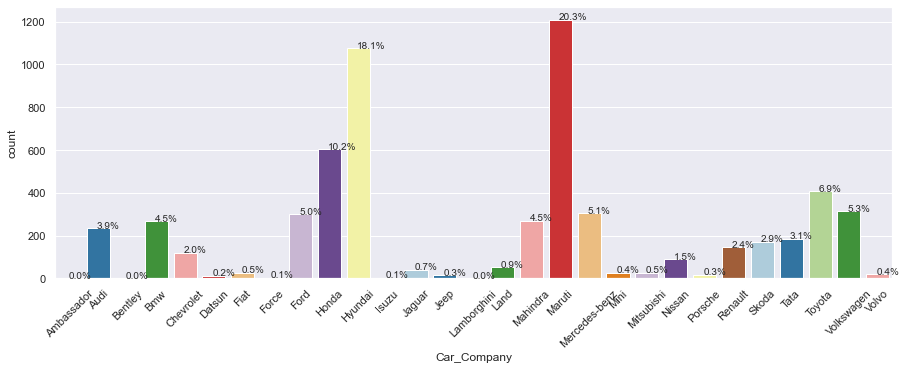

In [62]:
perc_on_bar(dataDF, 'Car_Company')

* Maruti has biggest share followed by Hyundai and Honda respectively
* Ambassador has lowest share. Reason can be high maintenace , high price or low mileage

### Bivariate analysis

### Coorelation analysis

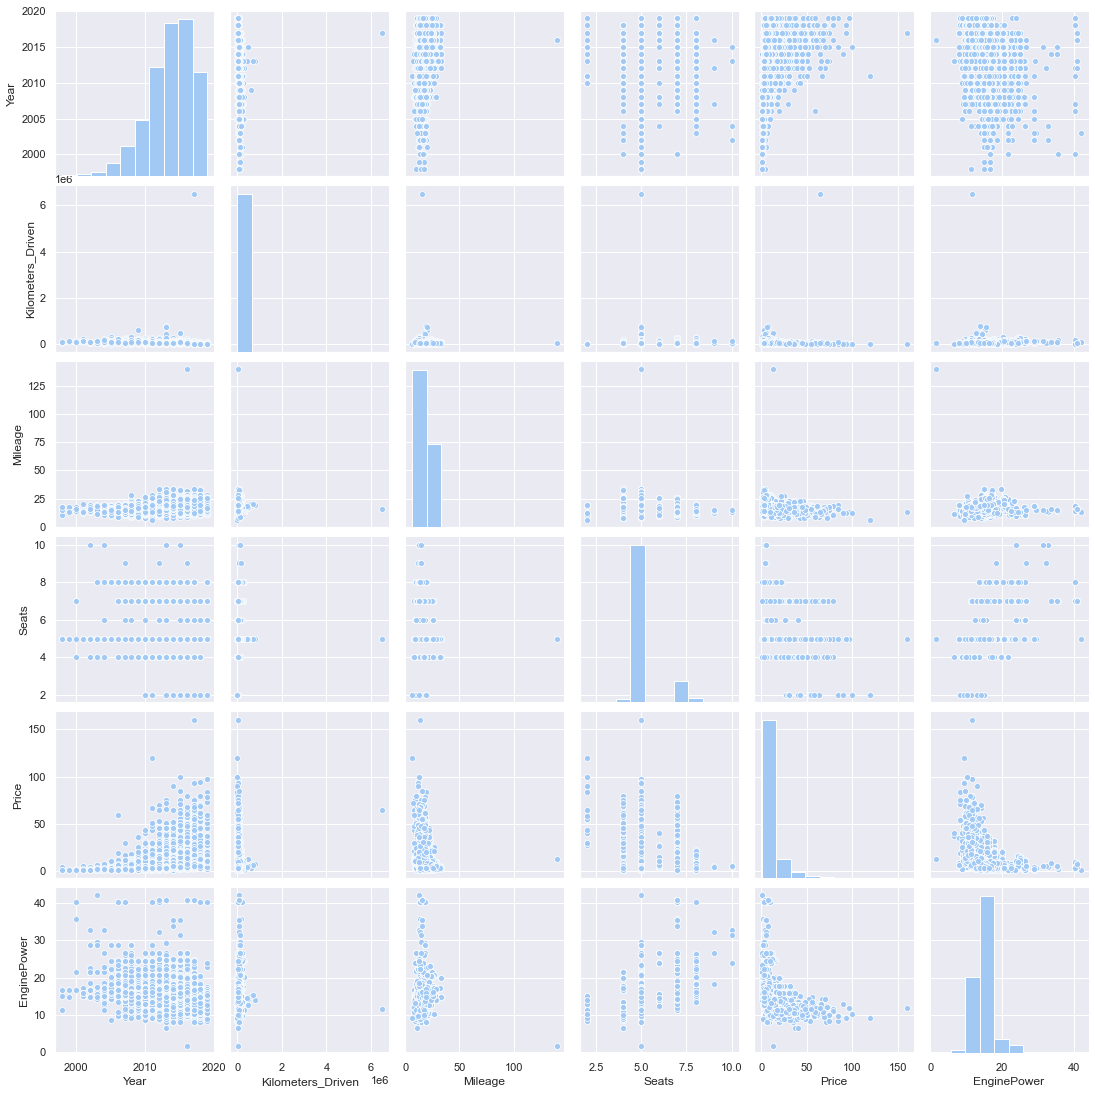

In [63]:
sns.pairplot(dataDF);

In [64]:
dataDFCorr = dataDF.corr()
dataDFCorr

,Year,Kilometers_Driven,Mileage,Price,EnginePower
Year,1.00,-0.17,0.28,0.30,-0.19
Kilometers_Driven,-0.17,1.00,-0.06,-0.01,0.09
Mileage,0.28,-0.06,1.00,-0.31,0.03
Price,0.30,-0.01,-0.31,1.00,-0.37
EnginePower,-0.19,0.09,0.03,-0.37,1.00


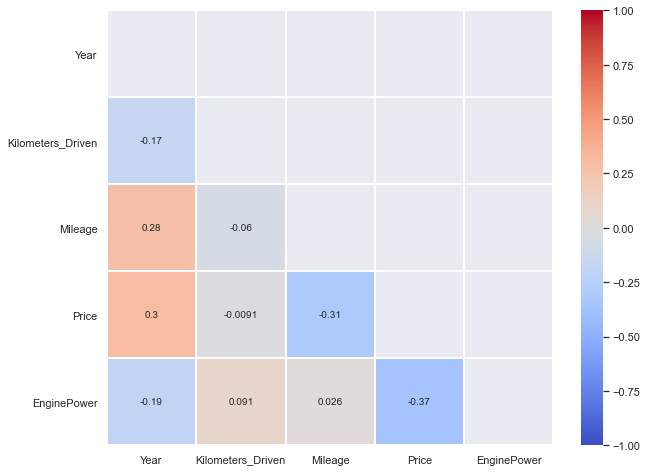

In [65]:
# Below steps  and configuration will create heat map for lower diagonal half only , as we know lower and 
# upper half half contains same value but with differnt order of axis.
def gen_heatmap(corrDF):
    cgf_mask = np.zeros_like(corrDF, dtype=np.bool)
    cgf_mask[np.triu_indices_from(cgf_mask)] = True
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corrDF,  annot=True, mask=cgf_mask, cmap= "coolwarm", vmax=1, vmin=-1, center=-0, 
                     linewidths=1, cbar_kws={"shrink": 1});
    
gen_heatmap(dataDFCorr)

* These variables has positive correlations - Mileage and Year manufactured, Price and year
* These variables has negative coorelations - Price and Mileage, EnginePower and Price, kilometers_driven and year, EnginePower and Year
* Other coorelation is very small , which has not much effect on each others relationship

### Let's check the variation in *Price* with some of the categorical columns in our data

### *Location* vs *Price*

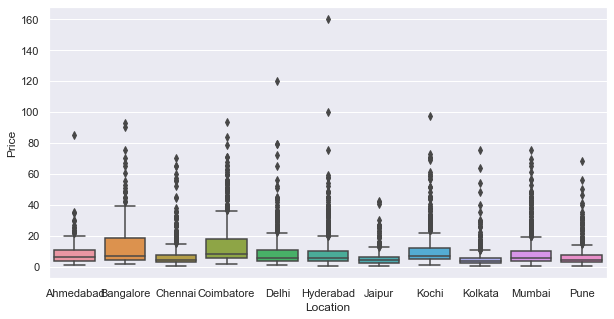

In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="Price", data=dataDF);

* Median price for cars are higher in Coimbatore 
* Kolkata has least median price for cars
* Car Price follows mix pattern among Tier 1 and Tier 2 cities

### *Fuel_Type* vs *Price*

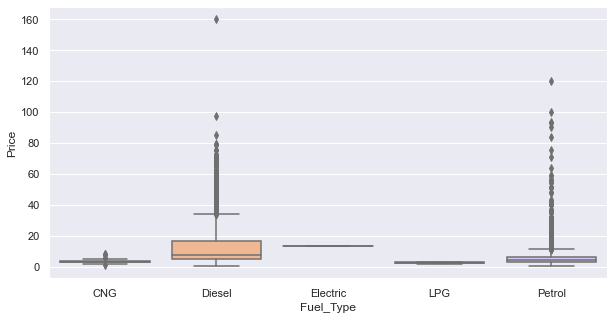

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=dataDF);

* Price for electric car can't be genralized because we have only one record in our dataset.
* Median price for Diesel cars are more 

### *Transmission* vs *Price*

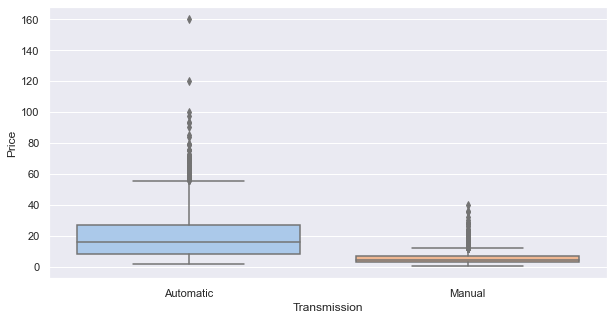

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=dataDF);

* Price for automatic transmission is more than Manual.  As a result people also prefer Manual Transmission type.

### *Owner_Type* vs *Price*

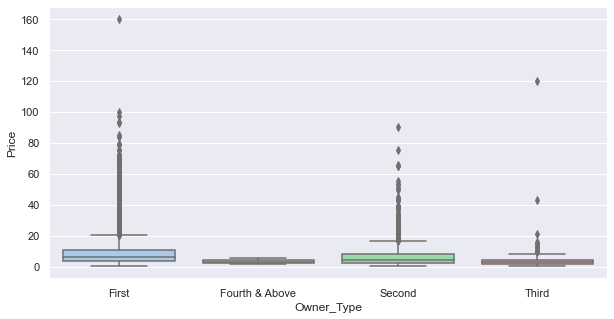

In [69]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=dataDF);

* In General First owner types pays more to own a car. And price is going down as ownership moved 
from first to second and so on. For Fourth and above owner ship price to to pay is very low.

### *Seats* vs *Price*

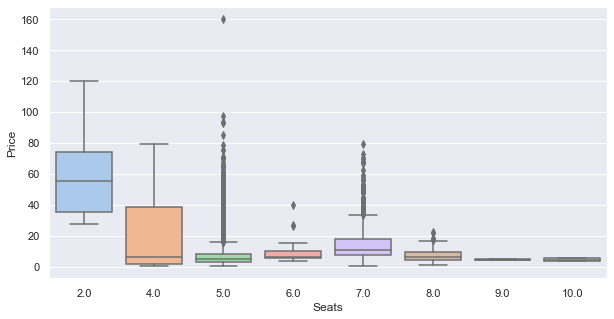

In [70]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Seats", y="Price", data=dataDF);

* Median prices for 2 seats car is highest among all types car seats type

## Variable Transformations

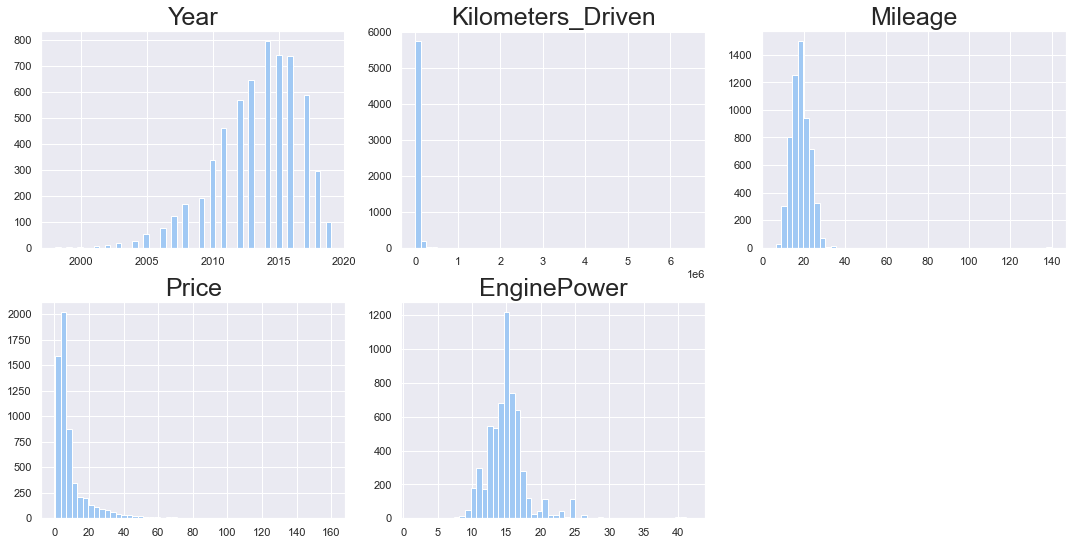

In [71]:
# Method and approach used from case study
# creating a list of numeric columns
dist_cols = [
    item for item in dataDF.select_dtypes(include=np.number).columns 
]

def create_num_histogram(df,cols):

    # let's plot a histogram of all numeric columns

    plt.figure(figsize=(15, 45))

    for i in range(len(cols)):
        plt.subplot(12, 3, i + 1)
        plt.hist(df[cols[i]], bins=50)
        plt.tight_layout()
        plt.title(cols[i], fontsize=25)

    plt.show()
    
create_num_histogram(dataDF, dist_cols)

* We see that most of the columns have a very skewed distribution.
* We will apply the log transformation to all columns to smoothen the skewness

In [72]:
# creating a copy of the dataframe
logDF = dataDF.copy()

# using log transforms on some columns

for col in dist_cols:
    logDF[col + "_log"] = np.log(logDF[col] + 1)

# dropping the original columns
logDF.drop(dist_cols, axis=1, inplace=True)
logDF.head()

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Car_Company,Year_log,Kilometers_Driven_log,Mileage_log,Price_log,EnginePower_log
0,Mumbai,CNG,Manual,First,5.00,Maruti,7.61,11.18,3.32,1.01,2.90
1,Pune,Diesel,Manual,First,5.00,Hyundai,7.61,10.62,3.03,2.60,2.61
2,Chennai,Petrol,Manual,First,5.00,Honda,7.61,10.74,2.95,1.70,2.68
3,Chennai,Diesel,Manual,First,7.00,Maruti,7.61,11.37,3.08,1.95,2.71
4,Coimbatore,Diesel,Automatic,Second,5.00,Audi,7.61,10.61,2.79,2.93,2.71


In [73]:
logDF.select_dtypes(include=np.number).columns

Index(['Year_log', 'Kilometers_Driven_log', 'Mileage_log', 'Price_log',
       'EnginePower_log'],
      dtype='object')

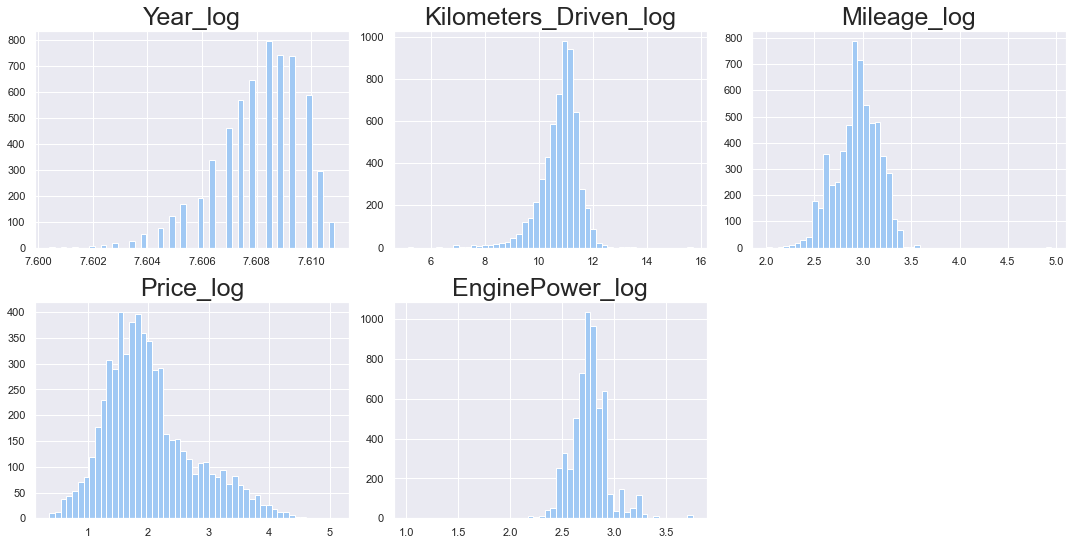

In [74]:
# creating a list of log columns
dist_log_cols = [
    item for item in logDF.select_dtypes(include=np.number).columns
]

create_num_histogram(logDF, dist_log_cols)

* Most of the columns are still showing skewness except Years_log which is still same as before.
* For all other columns skewness has smoothen suffciently to anlayze the coorelation now

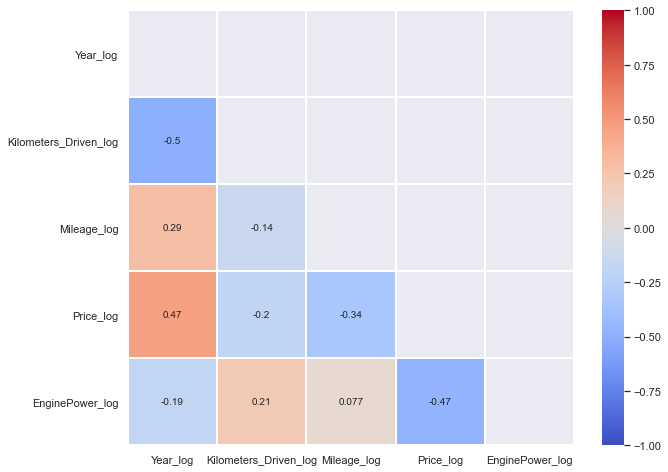

In [75]:
gen_heatmap(logDF.corr())

* These columns are negatively coorelated kilometers_drive_log and Year_log, EnginePower_log and Year_log, Mileage_log and Kilometers_Driven_log, Price_log and Kilometers_Driven_log, Price_log and Mileage_log,
* These columns are positively coorelated Mileage_log and Year_log, Price_log and Year_log, EnginePower_log and Kilometers_Driven_log
* EnginePower_log and Mileage_log has very small coorelation.
* Compared to previous coorelation map , logarithmic correlation is providing better picture for modelling.

## Model Building

### Define dependent variable  

* I have used same method and approach which is used in case study by replacing and reusing feature appropriately

In [76]:
ind_vars = logDF.drop(["Price_log"], axis=1)
dep_var = logDF[["Price_log"]]
logDF.shape

(5949, 11)

### Creating dummy variables for categorical  variables

In [77]:

def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Year_log,Kilometers_Driven_log,Mileage_log,EnginePower_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Car_Company_Audi,Car_Company_Bentley,Car_Company_Bmw,Car_Company_Chevrolet,Car_Company_Datsun,Car_Company_Fiat,Car_Company_Force,Car_Company_Ford,Car_Company_Honda,Car_Company_Hyundai,Car_Company_Isuzu,Car_Company_Jaguar,Car_Company_Jeep,Car_Company_Lamborghini,Car_Company_Land,Car_Company_Mahindra,Car_Company_Maruti,Car_Company_Mercedes-benz,Car_Company_Mini,Car_Company_Mitsubishi,Car_Company_Nissan,Car_Company_Porsche,Car_Company_Renault,Car_Company_Skoda,Car_Company_Tata,Car_Company_Toyota,Car_Company_Volkswagen,Car_Company_Volvo
0,7.61,11.18,3.32,2.90,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,7.61,10.62,3.03,2.61,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.61,10.74,2.95,2.68,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.61,11.37,3.08,2.71,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,7.61,10.61,2.79,2.71,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
ind_vars_num.shape

(5949, 57)

* Total rows are 5949 and  there are additional 46 columns

### Split the data into train and test , keeping the test size to 30% and randomly selecting the test records

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

### Fitting a linear model

In [80]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [81]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year_log,195.07
Kilometers_Driven_log,-0.05
Mileage_log,-0.81
EnginePower_log,-0.76
Location_Bangalore,0.14
Location_Chennai,0.04
Location_Coimbatore,0.10
Location_Delhi,-0.05
Location_Hyderabad,0.09
Location_Jaipur,-0.03


### Coefficient interpretations
* Intercept is big negative values. Which shows price of car , in general will always be go down
* Bangalore , chennai , coimbatore and hyderabad has positive Coefficients. which mean car prices are more respect to other location with respect to other location where car prices are going down.
* Fuel type diesel and electric has positive Coefficients. its a positive value but it will dereprciate the car value slightly.
* Some of the car company has positive Coefficients values like Audi, Bently , BMW , Jaguar, Lamborgini, Land, Mercedez-benz, Mini, Porsche, Volvo. They are not depreciating as quciky as other brands.
* All Tramission type, Owner  types and Seats types has negative values.
* In general, increase in positive coeffcient will increase the price where as increase in negative coefficient will decrease the price.

In [82]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [83]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

   RMSE  MAE  R^2  Adjusted R^2
0  0.22 0.16 0.91          0.91


Test Performance

   RMSE  MAE  R^2  Adjusted R^2
0  0.23 0.17 0.91          0.91


**Observations**

- The train and test $R^2$ are 0.91 and 0.91, indicating that the model explains 91% of the total variation in the train and test sets respectively. Coincidentally, both scores are matching exactly.
- RMSE values on the train and test sets are also  0.22 and 0.23 respectively.
- This shows that the model is not overfitting.
- MAE indicates that our current model is able to predict price within a mean error of 0.17 on the test set.
- We have been able to build a predictive model that can be used by Cars4U to predict the price of an car with an $R^2$ of 0.91 on the training set.

## Conclusions

- Cars4U can use this model to predict the price within a mean error of 0.17 on the test set.
- While taking log of Year increases the price but log of Kilometers_drive, Mileage and EnginePower is decreasing the price of car.
- We found that some of the car models which are  considered luxury, its price increases but other models which is more preferred by people like Maruti , Honda and Hyundi etc are decreasing.
- For Transmission types - Electric or Diesel car  tend to increase the car Price increases.
- EnginePower, Mileage and Kilometers_Driven factors decrease the car price.

## Recommendations

- Initial cost for car and long term expense are the main deciding factor for customer preference, below are the some the reasons
- Diesel price is slightly lower than petrol price
- Manual Transmission cars are cheaper than Automatic cars
- Diesel and Petrol driven car has fuelling stations easily available than electric cars
- 5 seat cars are good for small family size
- First owner wanted to hold on to their car as long as possible because second and subsequest ownership has big decline. So car purchase is very calculative decision by customer
- Maruti, Hyudi and Honda are among most preferred car because of low maintainability.
- There is not sufficent data to determine the pricing model for car. For Ex electric version of car has only one record.

## Verifying the model through Forward Feature Selection 


In [84]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1], # k_features denotes "Number of features to select"
    forward=True,  
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    3.0s finished

[2021-05-29 01:15:21] Features: 1/57 -- score: 0.3940971145879772[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.8s finished

[2021-05-29 01:15:21] Features: 2/57 -- score: 0.5608875882493237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.9s finished

[2021-05-29 01:15:22] Features: 3/57 -- score: 0.6508054758537881[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.9s finished

[2021-05-29 01:15:23] Features: 4/57 -- score: 0.7534911512537881[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(

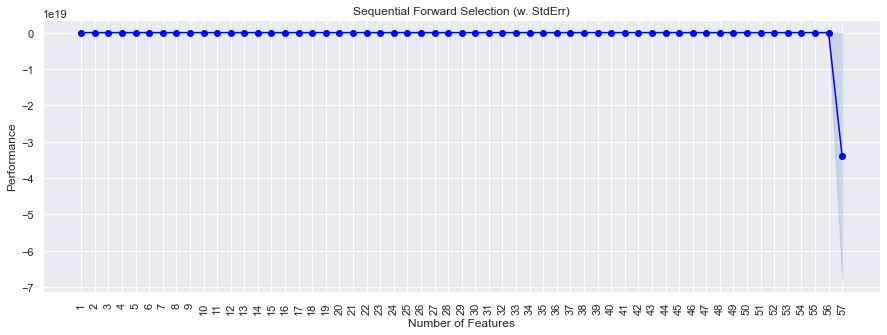

In [85]:
# To plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

* Plot is not giving much idea. This may be due to last feature is showing decline of 3 and half units. This effect has resulted in bigger unit of measurement for y labels and plot gives the feel of flat curve.
* But as per result from r2 score, It is going up untill 20th - 25th feature. We'll consider 20 feature for our maximum number of feature selection.

In [86]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  57 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.1s finished

[2021-05-29 01:16:24] Features: 1/30 -- score: 0.3940971145879772[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.2s finished

[2021-05-29 01:16:26] Features: 2/30 -- score: 0.5608875882493237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.2s finished

[2021-05-29 01:16:27] Features: 3/30 -- score: 0.6508054758537881[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.9s finished

[2021-05-29 01:16:28] Features: 4/30 -- score: 0.7534911512537881[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

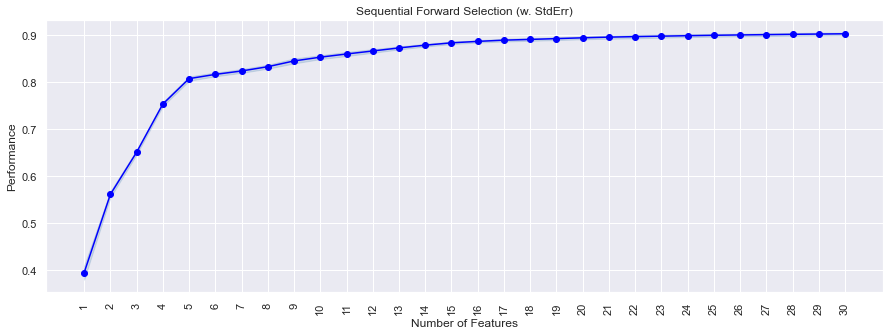

In [87]:
# Plot the performance again with selected number of features
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

* Plot is providing better curve details than previous plot because last feature is trimmed now , only best one 
are in set and all the feature score lies between 0.4 to 0.9

In [88]:
# Let us select features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 8, 11, 14, 17, 18, 20, 23, 29, 31, 32, 34, 37, 40, 43, 44, 46, 47, 48, 50, 52, 53, 54, 56]


### Now we will fit an sklearn model using these features only

In [89]:
x_train_final = x_train[x_train.columns[feat_cols]]

In [90]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

In [91]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                           Coefficients
Year_log                         194.88
Kilometers_Driven_log             -0.05
Mileage_log                       -0.83
EnginePower_log                   -0.83
Location_Bangalore                 0.17
Location_Chennai                   0.08
Location_Coimbatore                0.12
Location_Hyderabad                 0.12
Location_Kolkata                  -0.15
Fuel_Type_Diesel                   0.22
Fuel_Type_Petrol                  -0.20
Transmission_Manual               -0.14
Owner_Type_Second                 -0.06
Seats_5.0                         -0.23
Car_Company_Audi                   0.68
Car_Company_Bmw                    0.76
Car_Company_Chevrolet             -0.27
Car_Company_Fiat                  -0.27
Car_Company_Honda                  0.08
Car_Company_Jaguar                 0.89
Car_Company_Land                   0.88
Car_Company_Mahindra              -0.11
Car_Company_Mercedes-benz          0.75
Car_Company_Mini                   0.96


In [92]:
# model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model2, x_train_final, y_train))

# model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model2, x_test_final, y_test))

Training Performance

   RMSE  MAE  R^2  Adjusted R^2
0  0.22 0.17 0.91          0.91


Test Performance

   RMSE  MAE  R^2  Adjusted R^2
0  0.23 0.18 0.91          0.91


**Observations**

* The new model (*lin_reg_model2*) uses almost half the number of features as the previous model (*lin_reg_model*).
* The performance of this new model, however, is close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.